In [4]:
#Import packages
import numpy as np
from itertools import product, combinations
import plotly.graph_objects as go

# Lattice Planes

This program shows user-defined lattice planes of cubic Bravais lattices in a three-dimensional rotatable plot using the plotly library. Just enter the Miller indices of the respective lattice planes (e.g. h,k,l=2,2,2 or h,k,l=1,0,1) and the acronym for the lattice ("sc" for simple cubic, "fcc" for face-centered cubic and "bcc" for body-centered cubic) below and run the code.

In [5]:
#Miller indices
h,k,l=2,2,2
#lattice acronym
Type="fcc"

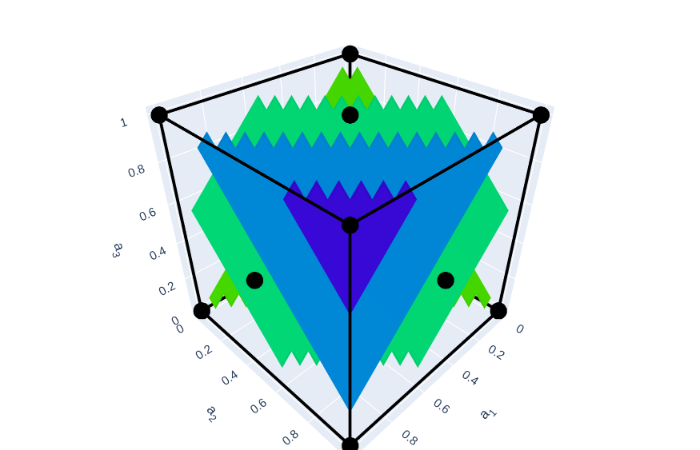

In [6]:
#normal vector n
n=np.array([h,k,l])
#normalized n
nn=n/ np.sqrt(np.sum(n**2))
#distance between lattice planes
d=1/np.sqrt(h**2+k**2+l**2)

#initiate plotly figure
layout = go.Layout(
    width=1000,
    height=800,
    margin=dict(l=0,
        r=0,
        b=0,
        t=0),
    coloraxis_showscale=False,
    coloraxis_cmin=0,
    #change if you have more planes
    coloraxis_cmax=7,
    coloraxis = {'colorscale':'hsv'},
    showlegend=False,
    scene = dict(xaxis_title='a<sub>1</sub>',
                 yaxis_title='a<sub>2</sub>',
                 zaxis_title='a<sub>3</sub>')
)
fig= go.Figure(layout=layout) 
#change if you need more planes in one direction
for i in range(-10,10,1):
    #start in front corner
    point=np.array([0,0,0])
    #go to ith planes
    point=point+nn*d*i
    c = -point.dot(n)
    #check wich dimension limits the plane, make array along other dimensions, calculate the third dimension and set nan every value outside the box  
    res=0.05
    if l>0:
        xx, yy = np.meshgrid(np.arange(0,1,res), np.arange(0,1,res))
        zz= (-n[0] * xx - n[1] * yy - c) * 1. /n[2]
        zz[zz<0]=np.nan
        zz[zz>1]=np.nan
    elif k>0:
        xx, zz = np.meshgrid(np.arange(0,1,res), np.arange(0,1,res))
        yy= (-n[0] * xx - n[2] * zz - c) * 1. /n[1]
        yy[yy<0]=np.nan
        yy[yy>1]=np.nan
    elif h>0:
        yy, zz = np.meshgrid(np.arange(0,1,res), np.arange(0,1,res))
        xx= (-n[1] * yy - n[2] * zz - c) * 1. /n[0]
        xx[xx<0]=np.nan
        xx[xx>1]=np.nan
    else:
        print("hkl can not all be zero")
    
    #add plane
    fig.add_trace(go.Surface(x=xx,y=yy,z=zz,surfacecolor=np.full((100,100), i),coloraxis="coloraxis"))

#lattice points sc lattice
r = [0, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        fig.add_trace(go.Scatter3d(x=[s[0],e[0]],y=[s[1],e[1]],z=[s[2],e[2]], line = dict(color = "rgb(0,0,0)", width = 6), marker = dict( size = 10,
                                      color = "rgb(0,0,0)"),))
#add bcc points
if Type == "bcc":
    fig.add_trace(go.Scatter3d(x=[0.5],y=[0.5],z=[0.5], line = dict(color = "rgb(0,0,0)", width = 6), marker = dict( size = 10,
                                      color = "rgb(0,0,0)"),))
#add fcc points
if Type == "fcc":
    x=[0.5,0.5,0,0.5,0.5,1]
    y=[0.5,0,0.5,0.5,1,0.5]
    z=[0,0.5,0.5,1,0.5,0.5]
    for i in range(0,6):
        fig.add_trace(go.Scatter3d(x=[x[i]],y=[y[i]],z=[z[i]], line = dict(color = "rgb(0,0,0)", width = 6), marker = dict( size = 10,
                                      color = "rgb(0,0,0)"),))

#fig.show() #uncomment to make rotatable, does not work on GitHub
fig.show("png") #uncomment to show figure on GitHub, is not rotatable